https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/

https://www.geeksforgeeks.org/python-image-classification-using-keras/

https://www.analyticsvidhya.com/blog/2022/01/image-classification-using-machine-learning/

https://github.com/hasabo/Machine-Learning/blob/master/Python/Image_Classification%20/Image_Classification.ipynb  

# Importing Libraries

In [1]:
import os
import cv2
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Loading Dataset

In [2]:
class_names = ['Malignant cases', 'Normal cases']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (224, 224)

In [3]:
def load_data():
  
    datasets = ['train', 'test']
    output = []    
    for dataset in datasets:        
        images = []
        labels = []        
        print("Loading {}".format(dataset))
        
        
        for folder in os.listdir(dataset):
            label = class_names_label[folder]            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):                
                img_path = os.path.join(os.path.join(dataset, folder), file)                
                image = cv2.imread(img_path)
                image = cv2.resize(image, IMAGE_SIZE)                 
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))
        
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading train


100%|████████████████████████████████████████████████████████████████████████████████| 428/428 [00:08<00:00, 47.65it/s]


Loading test


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:02<00:00, 50.48it/s]


# Shuffle Data 

In [6]:
from sklearn.utils import shuffle 
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

# Exploratory Data Analysis

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 876
Number of testing examples: 221
Each image is of size: (224, 224)


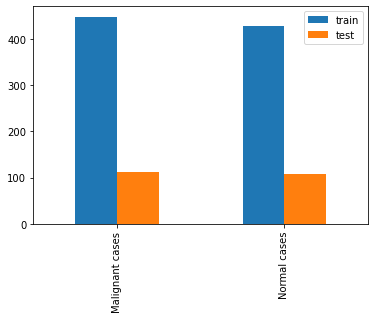

In [8]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

pd.DataFrame({'train': train_counts,
              'test': test_counts}, 
             index=class_names).plot.bar()

plt.show()

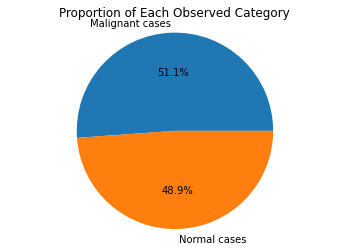

In [9]:
plt.pie(train_counts,
        explode=None, 
        labels=class_names,
        autopct='%1.1f%%')

plt.axis('equal')
plt.title('Proportion of Each Observed Category')
plt.show()

# Data Preprocessing

In [10]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

### Make Data 1D for compatability with Standard Classifiers

In [11]:
X_trainShape = train_images.shape[1]*train_images.shape[2]*train_images.shape[3]
X_testShape = test_images.shape[1]*test_images.shape[2]*test_images.shape[3]

X_trainFlat = train_images.reshape(train_images.shape[0], X_trainShape)
X_testFlat = test_images.reshape(test_images.shape[0], X_testShape)

# Machine Learning Models

# Decision Tree

In [12]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_trainFlat, train_labels)

DecisionTreeClassifier()

In [13]:
y_pred1 = tree.predict(X_testFlat)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred1)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred1)* 100}")

Accuracy is: 91.4027149321267


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       113
           1       0.94      0.88      0.91       108

    accuracy                           0.91       221
   macro avg       0.92      0.91      0.91       221
weighted avg       0.92      0.91      0.91       221

Confusion Matrix : 


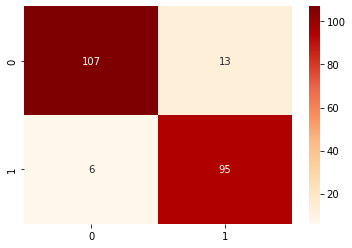

In [15]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred1))

cm = confusion_matrix(y_pred1, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [16]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred1))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred1)))

MAE: 0.08597285067873303
MSE: 0.08597285067873303
RMSE: 0.29321127310990797


In [17]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred1,average='weighted'))

Precision Score :  0.915576885742873
Recall Score :  0.9140271493212669
f1_score :  0.9138788502585523


# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_trainFlat, train_labels)

RandomForestClassifier()

In [19]:
y_pred3 = RandomForestClassifier.predict(X_testFlat)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred3)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred3)* 100}")

Accuracy is: 100.0


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       108

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221

Confusion Matrix : 


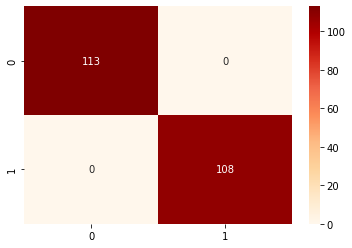

In [21]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred3))

cm = confusion_matrix(y_pred3, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred3))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred3)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [23]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred3,average='weighted'))

Precision Score :  1.0
Recall Score :  1.0
f1_score :  1.0


# ExtraTreesClassifier

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_trainFlat, train_labels)

ExtraTreesClassifier()

In [25]:
y_pred5 = extratree.predict(X_testFlat)

In [26]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred5)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred5)* 100}")

Accuracy is: 100.0


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       108

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221

Confusion Matrix : 


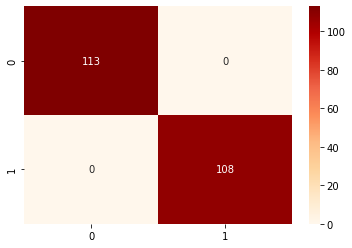

In [27]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred5))

cm = confusion_matrix(y_pred5, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [28]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred5))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred5)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [29]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred5,average='weighted'))

Precision Score :  1.0
Recall Score :  1.0
f1_score :  1.0


# KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_trainFlat, train_labels)

KNeighborsClassifier()

In [31]:
y_pred2 = KNeighborsClassifier.predict(X_testFlat)

In [32]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred2)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred2)* 100}")

Accuracy is: 98.19004524886877


Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       113
           1       0.99      0.97      0.98       108

    accuracy                           0.98       221
   macro avg       0.98      0.98      0.98       221
weighted avg       0.98      0.98      0.98       221

Confusion Matrix : 


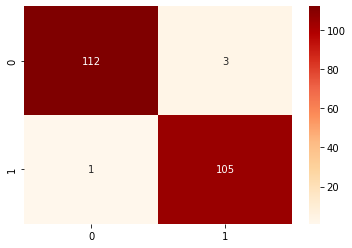

In [33]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred2))

cm = confusion_matrix(y_pred2, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred2))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred2)))

MAE: 0.01809954751131222
MSE: 0.01809954751131222
RMSE: 0.1345345587992625


In [35]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred2,average='weighted'))

Precision Score :  0.9820511583190732
Recall Score :  0.9819004524886877
f1_score :  0.9818952591441813


# XGBoost

# Evaluation -- XGBoost

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
classifier6 = LogisticRegression()
classifier6.fit(X_trainFlat, train_labels)

C:\Users\nafem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred6 = classifier6.predict(X_testFlat)

In [38]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred6)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred6)* 100}")

Accuracy is: 100.0


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       108

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221

Confusion Matrix : 


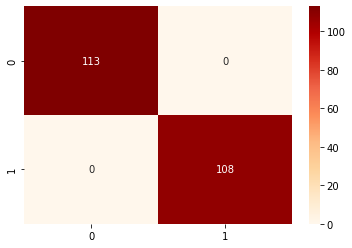

In [39]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred6))

cm = confusion_matrix(y_pred6, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Logistic Regression

In [40]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred6))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred6)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [41]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred6, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred6,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred6,average='weighted'))

Precision Score :  1.0
Recall Score :  1.0
f1_score :  1.0


# Support Vector Machine

# Evaluation -- Support Vector Machine